In [1]:
import pandas as pd 

df_trainx = pd.read_csv('weather_data_train.csv',sep=';',parse_dates=['datetime'], decimal=',').drop('datetime',axis=1)
df_trainy = pd.read_csv('weather_data_train_labels.csv',sep=';',parse_dates=['datetime'], decimal=',').drop('datetime',axis=1)

#test
df_testx = pd.read_csv('weather_data_test.csv',sep=';',parse_dates=['datetime'], decimal=',').drop('datetime',axis=1)
df_testy = pd.read_csv('weather_data_test_labels.csv',sep=';',parse_dates=['datetime'], decimal=',').drop('datetime',axis=1)

#molemmat
df_x = pd.concat([df_trainx, df_testx]).reset_index(drop=True)
df_y = pd.concat([df_trainy, df_testy]).reset_index(drop=True)
df_both = pd.concat([df_x, df_y],axis=1)

#features ja target
features = df_both.drop(['OBSERVED'], axis=1)
target = df_both[['OBSERVED']]


In [2]:
###dataset analyysi varsinkin targettien määrät
print(df_trainy['OBSERVED'].value_counts())
print(df_testy['OBSERVED'].value_counts())


1    1902
0    1238
Name: OBSERVED, dtype: int64
1    918
0    428
Name: OBSERVED, dtype: int64


In [3]:
df_x.head()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
0,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286
1,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143
2,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143
3,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571
4,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000


In [4]:
###histogrammit
from matplotlib import pyplot as plt
Tn_mu = pd.to_numeric(df_both['Tn_mu'])
Tx_mu = pd.to_numeric(df_both['Tx_mu'])

plt.hist(Tn_mu, alpha=0.5, label='Tn_mu')
plt.hist(Tx_mu, alpha=0.5, label='Tx_mu')
plt.legend(loc='upper right')
plt.show()

<Figure size 640x480 with 1 Axes>

(4486,)


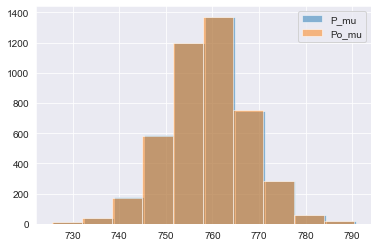

In [19]:
Tn_mu = pd.to_numeric(df_both['P_mu'])
Tx_mu = pd.to_numeric(df_both['Po_mu'])

print(Tx_mu.shape)
plt.hist(Tn_mu, alpha=0.5, label='P_mu')
plt.hist(Tx_mu, alpha=0.5, label='Po_mu')
plt.legend(loc='upper right')
plt.show()

<Figure size 1440x1440 with 0 Axes>

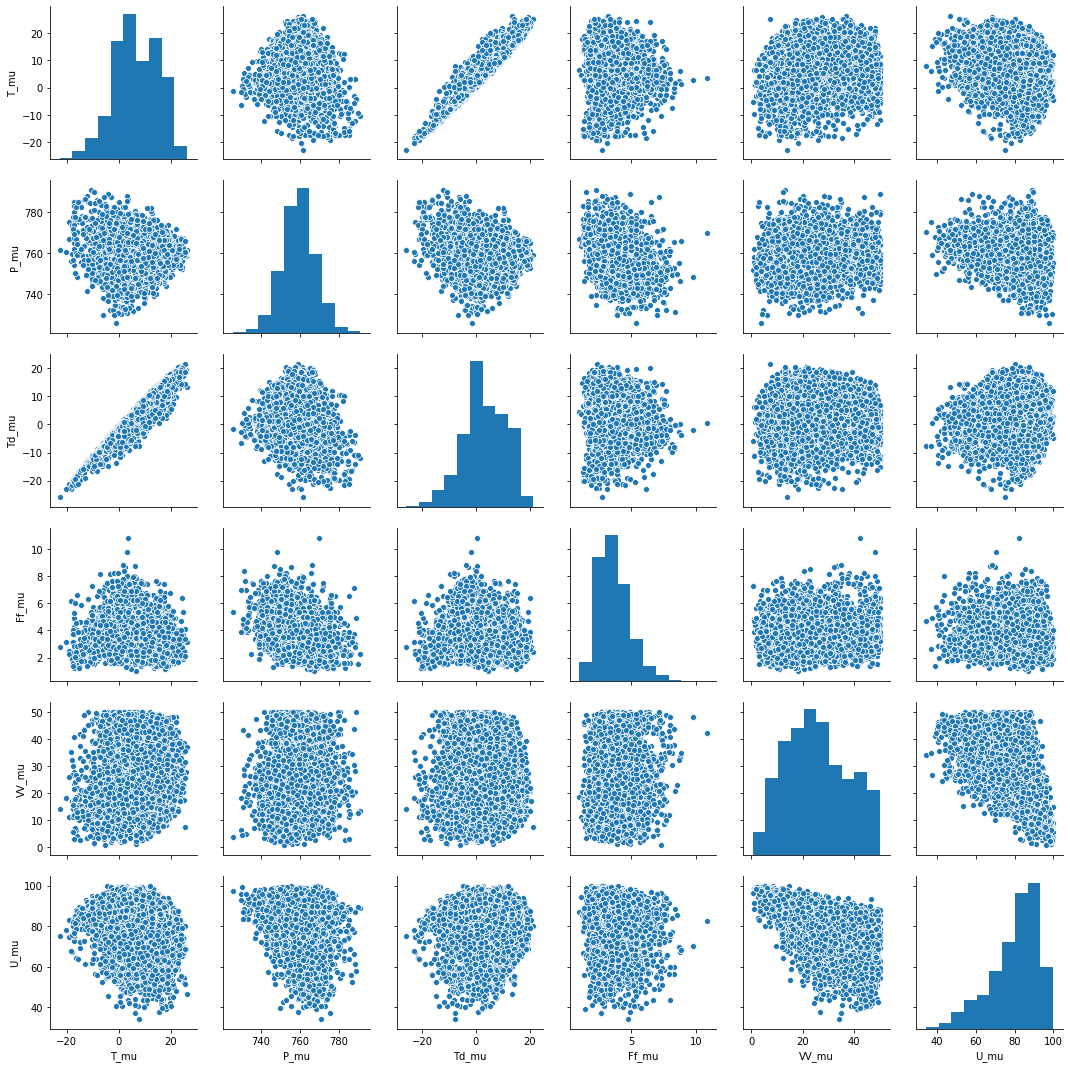

In [6]:
###pairplotit 
import seaborn as sns

plt.figure(figsize=(20,20))
sns.pairplot(df_both.loc[:,['T_mu', 'P_mu', 'Td_mu', 'Ff_mu', 'VV_mu', 'U_mu']])
plt.show()

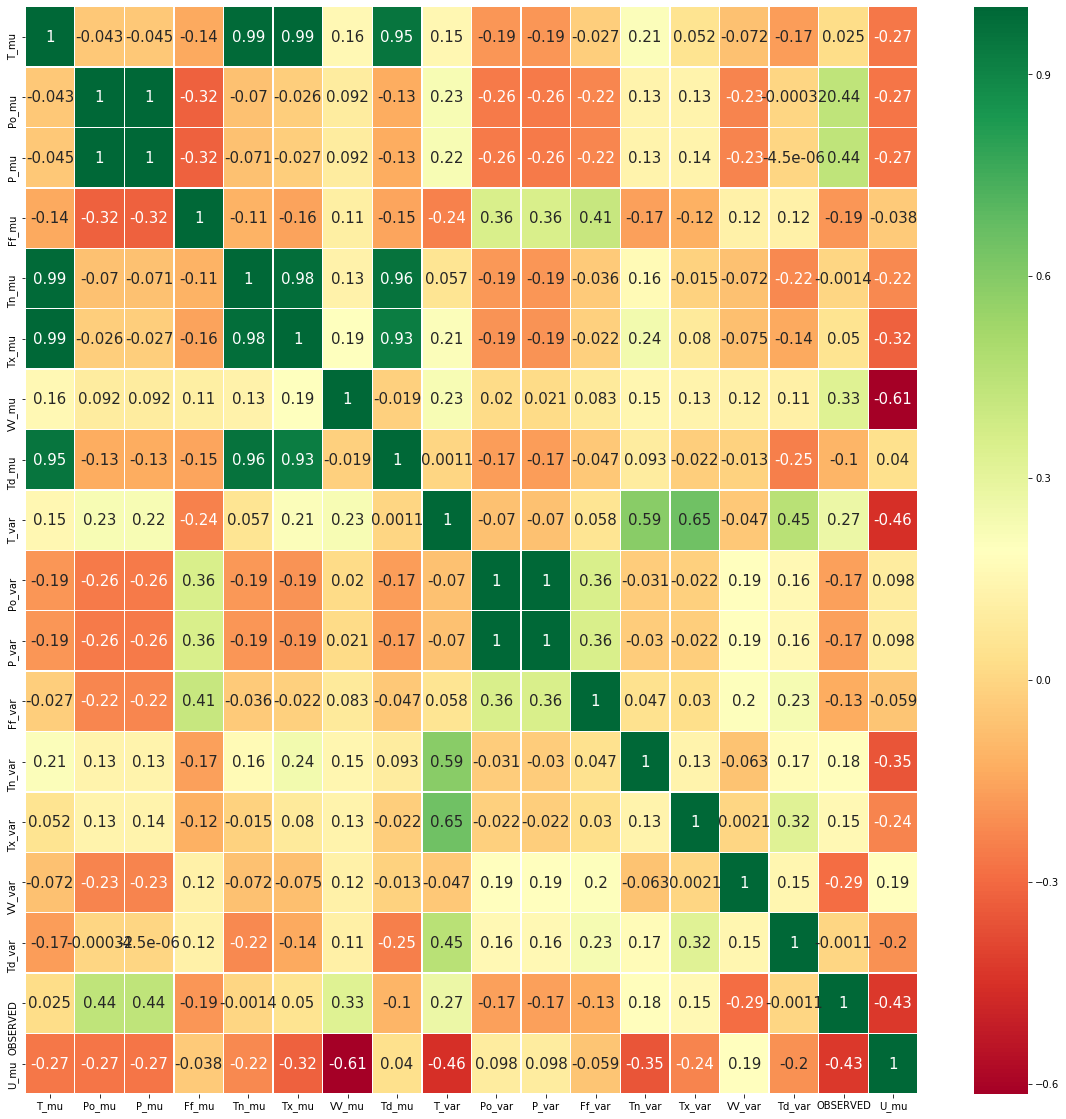

In [7]:
##correlaatio

df_both_corr = df_both.corr()
plt.figure(figsize=(20,20)) 
plt.tight_layout(pad=0)
sns.heatmap(df_both_corr, 
        xticklabels=df_both_corr.columns,
        yticklabels=df_both_corr.columns,
        annot=True, linewidths=.5,cmap="RdYlGn",annot_kws={"fontsize":15})
plt.savefig('corr.png')

No handles with labels found to put in legend.


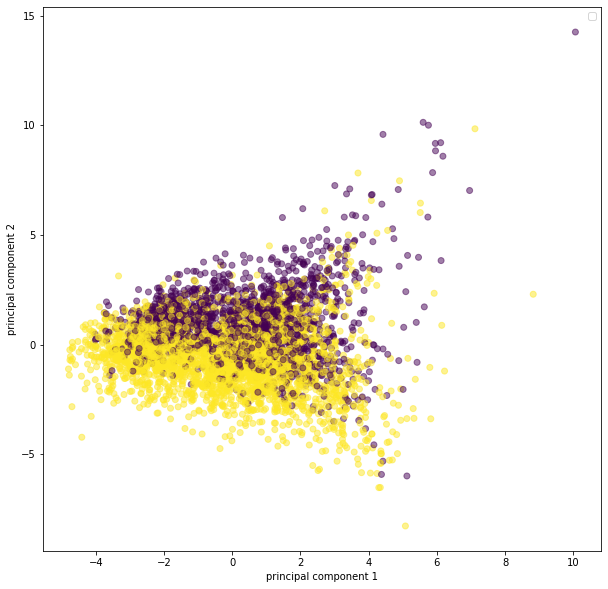

0       0
1       1
2       1
3       1
4       1
       ..
4481    1
4482    1
4483    1
4484    1
4485    0
Name: OBSERVED, Length: 4486, dtype: int64


In [8]:
###PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(df_x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf = pd.concat([principalDf,df_y[['OBSERVED']]],axis=1)
plt.figure(figsize=(10,10))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], alpha=0.5, c = principalDf.OBSERVED)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend(loc='upper right')
plt.show()

print( principalDf.OBSERVED)


[0.41601221 0.62721197 0.7806901  0.85472075 0.9022042  0.93804408
 0.96049428 0.9742213  0.98597537 0.99269679 0.99638683 0.99905707
 0.99978441 0.99999491 0.9999997  1.        ]


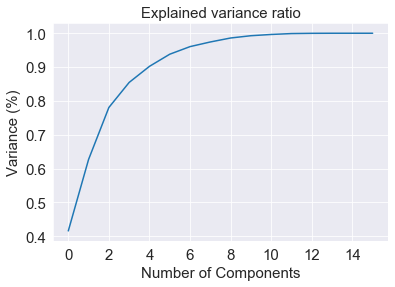

In [9]:
###explained variance
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_x)
pca = PCA().fit(data_rescaled)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure()
sns.set_style("darkgrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) #for each component
plt.title('Explained variance ratio', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [10]:
###linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

stan = StandardScaler()
#skaalataan
df_trainx_stan = stan.fit_transform(df_trainx)
df_testx_stan = stan.transform(df_testx)

regressor = LinearRegression() 
regressor.fit(df_trainx_stan, df_trainy[['U_mu']])
y_pred = regressor.predict(df_testx_stan)
print('Mean squared Error without PCA:', metrics.mean_squared_error(df_testy[['U_mu']], y_pred))
print('R2 score without PCA:', metrics.r2_score(df_testy[['U_mu']], y_pred))


#kokeillaan PCA:n kanssa
pca2 = PCA(n_components=12)
pca2.fit(df_trainx_stan)
pca_trainx =  pca2.transform(df_trainx_stan)
pca_testx = pca2.transform(df_testx_stan)

regressorPCA = LinearRegression() 
regressorPCA.fit(pca_trainx, df_trainy[['U_mu']])
PCA_y_pred = regressorPCA.predict(pca_testx)
print('Mean Squared Error with PCA:', metrics.mean_squared_error(df_testy[['U_mu']], PCA_y_pred))
print('R2 score with PCA:', metrics.r2_score(df_testy[['U_mu']], PCA_y_pred))


Mean squared Error without PCA: 2.429568807698472
R2 score without PCA: 0.9849910138257619
Mean Squared Error with PCA: 4.266165195530136
R2 score with PCA: 0.9736451940633105


In [11]:
###linear regression part2 lassolla
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0001, max_iter=1e6, normalize=False)
lassoreg.fit(df_trainx_stan, df_trainy[['U_mu']])
y_pred2 = lassoreg.predict(df_testx_stan)
print('Mean squared Error without PCA:', metrics.mean_squared_error(df_testy[['U_mu']], y_pred2))
print('R2 score without PCA:', metrics.r2_score(df_testy[['U_mu']], y_pred2))

regressorPCAz = Lasso(alpha=0.0001, max_iter=1e6, normalize=False)
regressorPCAz.fit(pca_trainx, df_trainy[['U_mu']])
y_predz = regressorPCAz.predict(pca_testx)

print('Mean squared Error with PCA:', metrics.mean_squared_error(df_testy[['U_mu']], y_predz))

Mean squared Error without PCA: 2.4307940796936767
R2 score without PCA: 0.9849834445441769
Mean squared Error with PCA: 4.265980245656846


C:\Users\Ken\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


accuracy 0.7979197622585439
f1 score 0.7729960317460318


Text(0.5, 1, 'KNeighbors')

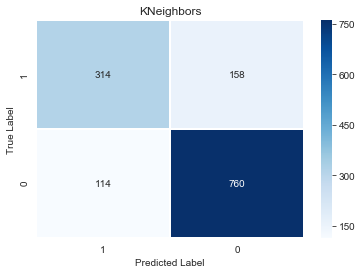

In [12]:
###classifier kneighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
target_train = df_trainy[['OBSERVED']]
target_test = df_testy[['OBSERVED']]


model = KNeighborsClassifier(n_neighbors=48)
model.fit(df_trainx_stan ,target_train)
predicted = model.predict(df_testx_stan)
print('accuracy', accuracy_score(predicted, target_test))
print('f1 score', metrics.f1_score(predicted, target_test, average = 'macro'))
sns.heatmap(confusion_matrix(predicted, target_test), 
        xticklabels=[1,0],
        yticklabels=[1,0],
        annot=True,
        fmt='g',
        linewidths=.5,
        cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('KNeighbors')

C:\Users\Ken\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


accuracy 0.7860326894502229
f1 score 0.7648480436760692


Text(0.5, 1, 'KNeighbors with stratify')

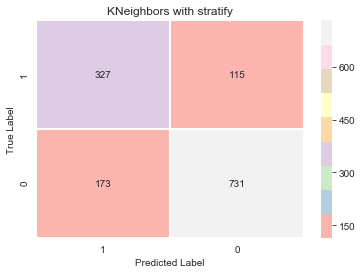

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, target[['OBSERVED']], test_size=0.30, random_state=42, 
                                                    stratify = target[['OBSERVED']])
stan = StandardScaler()
#skaalataan
df_trainx_stan = stan.fit_transform(X_train)
df_testx_stan = stan.transform(X_test)

model = KNeighborsClassifier(n_neighbors=48)
model.fit(df_trainx_stan ,y_train)
predicted = model.predict(df_testx_stan)
print('accuracy', accuracy_score(predicted, y_test))
print('f1 score', metrics.f1_score(predicted, y_test, average = 'macro'))
sns.heatmap(confusion_matrix(predicted, y_test), 
        xticklabels=[1,0],
        yticklabels=[1,0],
        annot=True,
        fmt='g',
        linewidths=.5,
        cmap='Pastel1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('KNeighbors with stratify')

C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.7949479940564635
f1 score 0.7688856372852759


Text(0.5, 1, 'Logistic Regression')

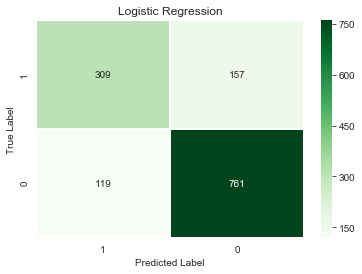

In [14]:
###logistic regression 
from sklearn.linear_model import LogisticRegression
df_trainx_stan = stan.fit_transform(df_trainx)
df_testx_stan = stan.transform(df_testx)

logisticRegr = LogisticRegression()
logisticRegr.fit(df_trainx_stan, target_train)
log_pred = logisticRegr.predict(df_testx_stan)
print('accuracy', accuracy_score(log_pred, target_test))
print('f1 score', metrics.f1_score(log_pred, target_test, average = 'macro'))

sns.heatmap(confusion_matrix(log_pred, target_test), 
        xticklabels=[1,0],
        yticklabels=[1,0],
        annot=True,
        fmt='g',
        linewidths=.5,
        cmap='Greens')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Logistic Regression')

C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.7912332838038633
f1 score 0.7760008054414678


Text(0.5, 1, 'Log with stratify')

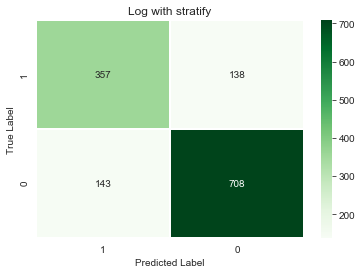

In [15]:

X_train, X_test, y_train, y_test = train_test_split(df_x, target[['OBSERVED']], test_size=0.30, random_state=42, 
                                                    stratify = target[['OBSERVED']])
stan = StandardScaler()
#skaalataan
df_trainx_stan = stan.fit_transform(X_train)
df_testx_stan = stan.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(df_trainx_stan ,y_train)
predicted = logmodel.predict(df_testx_stan)
print('accuracy', accuracy_score(predicted, y_test))
print('f1 score', metrics.f1_score(predicted, y_test, average = 'macro'))
sns.heatmap(confusion_matrix(predicted, y_test), 
        xticklabels=[1,0],
        yticklabels=[1,0],
        annot=True,
        fmt='g',
        linewidths=.5,
        cmap='Greens')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Log with stratify')

In [16]:
###PCA:n kanssa classifier 

pca3 = PCA(n_components=12)
pca3.fit(df_trainx_stan)
pca_trainx =  pca3.transform(df_trainx_stan)
pca_testx = pca3.transform(df_testx_stan)

#kneighbors
model = KNeighborsClassifier(n_neighbors=48)
model.fit(pca_trainx ,target_train)
predicted = model.predict(pca_testx)
print('acc pca kn', accuracy_score(predicted, target_test))
print('f1 pca kn', metrics.f1_score(predicted, target_test, average = 'macro'))

#logistic
logisticRegrPCA = LogisticRegression()
logisticRegrPCA.fit(pca_trainx, target_train)
log_predPCA = logisticRegrPCA.predict(pca_testx)
print('acc log pca', accuracy_score(log_predPCA, target_test))
print('f1 log pca', metrics.f1_score(log_predPCA, target_test, average = 'macro'))



C:\Users\Ken\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


acc pca kn 0.637444279346211
f1 pca kn 0.47669853409815166
acc log pca 0.6768202080237742
f1 log pca 0.40801785925523754


C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\Ken\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ken\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWa

C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ken\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ken\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-

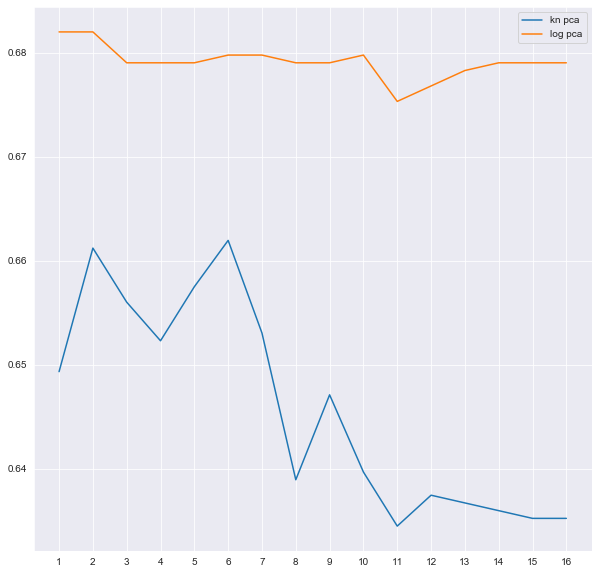

In [17]:
#hieno graafi ja analyysi PCA:n hyödyistä
logpca = []
knpca = []
komponentit = list(range(1,17))
df_trainx_stan = stan.fit_transform(X_train)
df_testx_stan = stan.transform(X_test)
target_train = df_trainy[['OBSERVED']]
target_test = df_testy[['OBSERVED']]

for i in komponentit: 
    pca4 = PCA(n_components=i)
    pca4.fit(df_trainx_stan)
    pca_trainx =  pca4.transform(df_trainx_stan)
    pca_testx = pca4.transform(df_testx_stan)
    #kn pca
    model = KNeighborsClassifier(n_neighbors=48)
    model.fit(pca_trainx ,target_train)
    predicted = model.predict(pca_testx)
    knpca.append(accuracy_score(predicted, target_test))
    #log pca    
    logisticRegrPCA = LogisticRegression()
    logisticRegrPCA.fit(pca_trainx, target_train)
    log_predPCA = logisticRegrPCA.predict(pca_testx)
    logpca.append(accuracy_score(log_predPCA, target_test))
    
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.lineplot(x = komponentit, y =knpca, label='kn pca')
sns.lineplot(x = komponentit, y= logpca, label='log pca')
plt.xticks(komponentit)
plt.legend(loc='best')
plt.show()

In [18]:
print(df_x.shape)

(4486, 16)
